# RNC PARA PREDICCIÓN DEL TIPO DE GRANO DE CAFÉ

### Integrantes

- Daniel Ortiz Aristizábal
- Felipe Torres Montoya
- Samuel Betancur Muñoz

In [ ]:
# Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# Tratamiento de imágenes
from PIL import Image
# Lectura del directorio de imágenes
import os
# Codificación de etiquetas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Preparación de imágenes

In [ ]:
# Función para cargar imágenes y etiquetas desde una carpeta
def cargar_imagenes_y_etiquetas(carpeta, etiqueta, img_size=(256, 256)):
    imagenes = []
    etiquetas = []
    for archivo in os.listdir(carpeta):
        if archivo.endswith(".jpg"):
            ruta = os.path.join(carpeta, archivo)
            print(ruta)
            imagen = Image.open(ruta)
            imagen = imagen.resize(img_size)
            imagen = np.array(imagen) # Convertir la imagen a una matriz de np
            imagen = imagen / 255.0  # Normalizar valores de píxeles
            imagenes.append(imagen)
            etiquetas.append(etiqueta)
    return imagenes, etiquetas

# Cargar imágenes de los tipos de granos de café desde las carpetas correspondientes
maduros_imgs, maduros_etiquetas = cargar_imagenes_y_etiquetas("/content/maduros", etiqueta="maduros")
pintones_imgs, pintones_etiquetas = cargar_imagenes_y_etiquetas("/content/pintones", etiqueta="pintones")
secos_imgs, secos_etiquetas = cargar_imagenes_y_etiquetas("/content/secos", etiqueta="secos")
sobremaduros_imgs, sobremaduros_etiquetas = cargar_imagenes_y_etiquetas("/content/sobremaduros", etiqueta="sobremaduros")
verdes_imgs, verdes_etiquetas = cargar_imagenes_y_etiquetas("/content/verdes", etiqueta="verdes")

/content/maduros/IMG_20210314_144655544.jpg
/content/maduros/IMG_20210314_145317526.jpg
/content/maduros/IMG_20210314_155633331.jpg
/content/maduros/IMG_20210314_142500492.jpg
/content/maduros/IMG_20210314_160440488.jpg
/content/maduros/IMG_20210314_145130688.jpg
/content/maduros/IMG_20210314_142440626.jpg
/content/maduros/IMG_20210314_155407065.jpg
/content/maduros/IMG_20210314_155921557.jpg
/content/maduros/IMG_20210314_141901452.jpg
/content/maduros/IMG_20210314_141749571.jpg
/content/maduros/IMG_20210314_155614832.jpg
/content/maduros/IMG_20210314_160627660.jpg
/content/maduros/IMG_20210314_142319996.jpg
/content/maduros/IMG_20210314_141802472.jpg
/content/maduros/IMG_20210314_142222836.jpg
/content/maduros/IMG_20210314_160124361.jpg
/content/maduros/IMG_20210314_144913458.jpg
/content/maduros/IMG_20210314_160104310.jpg
/content/maduros/IMG_20210314_155357103.jpg
/content/maduros/IMG_20210314_155447866.jpg
/content/maduros/IMG_20210314_145337839.jpg
/content/maduros/IMG_20210314_14

In [ ]:
# Concatenar los dos conjuntos de datos en un único df
X = np.concatenate((maduros_imgs,pintones_imgs,secos_imgs,sobremaduros_imgs,verdes_imgs))
Y= np.concatenate((maduros_etiquetas,pintones_etiquetas,secos_etiquetas,sobremaduros_etiquetas,verdes_etiquetas))
print(Y)

['maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros' 'maduros'
 'madu

In [ ]:
# Codificar las categorías de la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y=labelencoder.fit_transform(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

# 2. División 70-30

In [ ]:
# Dividir el conjunto de datos en entrenamiento (70%) y evaluación (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train.transpose(0, 3, 1, 2), dtype=torch.float32) # (N, C, H, W) reorganización de los ejes
X_test = torch.tensor(X_test.transpose(0, 3, 1, 2), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Crear DataLoaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# 3. Aprendizaje

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3, padding=1) # Conv 1 de 16 kernels de tamaño 3x3
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling (128x128x16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # Conv 2 de 32 kernels de tamaño 3x3
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling (64x64x32)

        self.flatten = nn.Flatten() # Flatten para convertir a formato unidimensional (64x64x32 = 131.072 elementos por imagen)
        self.dropout = nn.Dropout(p=0.2) # Dropout del 20% para evitar overfitting

        self.fc1 = nn.Linear(64 * 64 * 32, 100) # Capa oculta, recibe los 131.072 elementos y genera una salida de 100 neuronas
        self.fc2 = nn.Linear(100, num_classes)  # Capa de salida (no se usa softmax porque CrossEntropyLoss lo aplica internamente)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Establecer el dispositivo e inicializar el modelo
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN(in_channels=3, num_classes=5).to(device)
print(model)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=131072, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=5, bias=True)
)


In [ ]:
# Configurar pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Entrenar el modelo
import time

num_epochs = 30
history_loss = []
history_acc = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    start_time = time.time()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calcular accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    end_time = time.time()
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    epoch_time = end_time - start_time
    ms_per_step = (epoch_time / len(train_loader)) * 1000

    history_loss.append(epoch_loss)
    history_acc.append(epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - {int(epoch_time)}s {int(ms_per_step)}ms/step - accuracy: {epoch_acc:.4f} - loss: {epoch_loss:.4f}")

Epoch 1/30 - 0s 17ms/step - accuracy: 0.4554 - loss: 1.4024
Epoch 2/30 - 0s 16ms/step - accuracy: 0.7512 - loss: 0.6804
Epoch 3/30 - 0s 16ms/step - accuracy: 0.8216 - loss: 0.4655
Epoch 4/30 - 0s 15ms/step - accuracy: 0.8756 - loss: 0.3261
Epoch 5/30 - 0s 16ms/step - accuracy: 0.9131 - loss: 0.2605
Epoch 6/30 - 0s 17ms/step - accuracy: 0.9225 - loss: 0.2230
Epoch 7/30 - 0s 17ms/step - accuracy: 0.9484 - loss: 0.1675
Epoch 8/30 - 0s 17ms/step - accuracy: 0.9272 - loss: 0.1861
Epoch 9/30 - 0s 16ms/step - accuracy: 0.9554 - loss: 0.1309
Epoch 10/30 - 0s 15ms/step - accuracy: 0.9624 - loss: 0.1663
Epoch 11/30 - 0s 16ms/step - accuracy: 0.9484 - loss: 0.1235
Epoch 12/30 - 0s 16ms/step - accuracy: 0.9624 - loss: 0.1101
Epoch 13/30 - 0s 16ms/step - accuracy: 0.9765 - loss: 0.0672
Epoch 14/30 - 0s 16ms/step - accuracy: 0.9812 - loss: 0.0735
Epoch 15/30 - 0s 16ms/step - accuracy: 0.9718 - loss: 0.0670
Epoch 16/30 - 0s 16ms/step - accuracy: 0.9765 - loss: 0.0607
Epoch 17/30 - 0s 16ms/step - accu

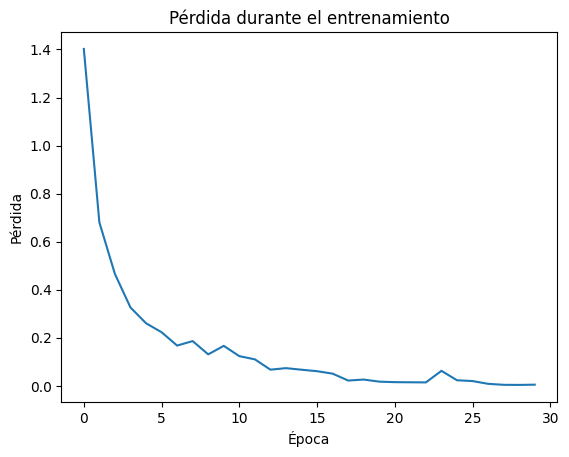

In [ ]:
# Gráfica del error por cada iteración
plt.plot(history_loss)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.show()

# 4. Evaluación

In [ ]:
# Evaluar el modelo con el conjunto de prueba
model.eval()
correct = 0
total = 0
test_loss = 0.0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader)
accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4167
Test Accuracy: 0.9071


# 5. Optimización de la red

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_Optimized(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN_Optimized, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3, padding=1) # Conv 1 de 16 kernels de tamaño 3x3
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling (128x128x16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # Conv 2 de 32 kernels de tamaño 3x3
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling (64x64x32)

        self.conv3 = nn.Conv2d(32, 48, kernel_size=3, padding=1) # Conv 3 de 48 kernels de tamaño 3x3
        self.bn3 = nn.BatchNorm2d(48)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling (32x32x48)

        self.flatten = nn.Flatten() # Flatten para convertir a formato unidimensional (32x32x48 = 49.152 elementos por imagen)
        self.dropout = nn.Dropout(p=0.2) # Dropout del 20% para evitar overfitting

        self.fc1 = nn.Linear(32 * 32 * 48, 70) # Capa oculta 1, recibe los 49.152 elementos y genera una salida de 70 neuronas
        self.fc2 = nn.Linear(70, 35) # Capa Oculta 2 con 35 neuronas
        self.fc3 = nn.Linear(35, num_classes)  # Capa de salida (no se usa softmax porque CrossEntropyLoss lo aplica internamente)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.flatten(x)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

# Establecer el dispositivo e inicializar el modelo
device = "cuda" if torch.cuda.is_available() else "cpu"
model_opt = CNN_Optimized(in_channels=3, num_classes=5).to(device)
print(model_opt)

CNN_Optimized(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=49152, out_features=70, bias=True)
  (fc2): Linear(in_features=70, out_features=35, bias=True)
  (fc3): Linear(in

In [ ]:
# Configurar pérdida y optimizador
criterion_opt = nn.CrossEntropyLoss()
optimizer_opt = torch.optim.Adam(model_opt.parameters(), lr=0.001)

In [ ]:
# Entrenar el modelo
import time

num_epochs = 30
history_loss = []
history_acc = []

for epoch in range(num_epochs):
    model_opt.train()
    running_loss = 0.0
    correct = 0
    total = 0

    start_time = time.time()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer_opt.zero_grad()
        outputs = model_opt(images)
        loss = criterion_opt(outputs, labels)
        loss.backward()
        optimizer_opt.step()

        running_loss += loss.item()

        # Calcular accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    end_time = time.time()
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    epoch_time = end_time - start_time
    ms_per_step = (epoch_time / len(train_loader)) * 1000

    history_loss.append(epoch_loss)
    history_acc.append(epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - {int(epoch_time)}s {int(ms_per_step)}ms/step - accuracy: {epoch_acc:.4f} - loss: {epoch_loss:.4f}")

Epoch 1/30 - 0s 19ms/step - accuracy: 0.4507 - loss: 1.9155
Epoch 2/30 - 0s 18ms/step - accuracy: 0.5258 - loss: 1.1183
Epoch 3/30 - 0s 18ms/step - accuracy: 0.6009 - loss: 0.8016
Epoch 4/30 - 0s 17ms/step - accuracy: 0.6737 - loss: 0.8158
Epoch 5/30 - 0s 17ms/step - accuracy: 0.7700 - loss: 0.5729
Epoch 6/30 - 0s 17ms/step - accuracy: 0.7535 - loss: 0.5848
Epoch 7/30 - 0s 16ms/step - accuracy: 0.7864 - loss: 0.5461
Epoch 8/30 - 0s 16ms/step - accuracy: 0.8357 - loss: 0.4578
Epoch 9/30 - 0s 17ms/step - accuracy: 0.8333 - loss: 0.4519
Epoch 10/30 - 0s 16ms/step - accuracy: 0.8146 - loss: 0.4631
Epoch 11/30 - 0s 16ms/step - accuracy: 0.8803 - loss: 0.3415
Epoch 12/30 - 0s 16ms/step - accuracy: 0.8545 - loss: 0.4244
Epoch 13/30 - 0s 16ms/step - accuracy: 0.8709 - loss: 0.3695
Epoch 14/30 - 0s 17ms/step - accuracy: 0.8662 - loss: 0.3652
Epoch 15/30 - 0s 16ms/step - accuracy: 0.8498 - loss: 0.3835
Epoch 16/30 - 0s 17ms/step - accuracy: 0.8873 - loss: 0.3358
Epoch 17/30 - 0s 17ms/step - accu

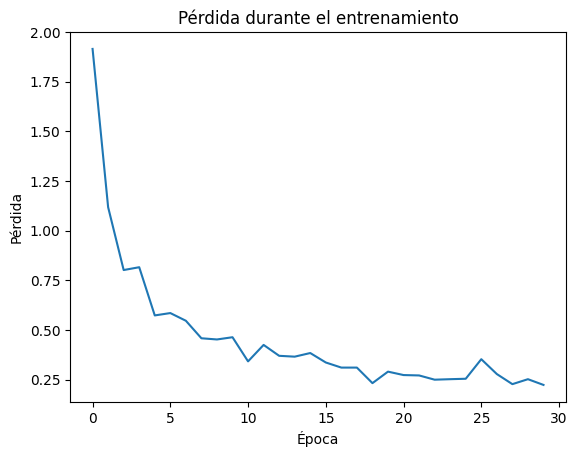

In [ ]:
# Gráfica del error por cada iteración
plt.plot(history_loss)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.show()

In [ ]:
# Evaluar el modelo con el conjunto de prueba
model_opt.eval()
correct = 0
total = 0
test_loss = 0.0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_opt(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader)
accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1866
Test Accuracy: 0.9344


# 6. Guardar el modelo

In [ ]:
# Guardamos el modelo
torch.save(model.state_dict(), 'model_deep.pth')

In [ ]:
# Guardamos el labelencoder
import pickle
filename = 'labelencoder.pkl'
pickle.dump(labelencoder, open(filename, 'wb'))

In [ ]:
# Guardamos el modelo optimizado
torch.save(model_opt.state_dict(), 'model_deep_opt.pth')